# TITANIC MACHINE LEARNING LEARN

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## IMPORT ALL DICTIONARIES THAT WE NEED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Take train and test data to export it into Jupyter Notebook.

In [2]:
train = pd.read_csv('/Users/raveltowangistu/Desktop/Iykra/titanic/train.csv')
test = pd.read_csv('/Users/raveltowangistu/Desktop/Iykra/titanic/test.csv')

Try to print the head of each columns in the variables.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Based on explanation, we can know that there is passengerID, Name, Sex, Age, Sibsp (Number of Siblings or Spouse), Parch (Number of Parents/Children Abroad), Ticket, Fare, Cabin ane Embarked.

## DATA UNDERSTANDING & PREPARATION

In order to understand more about the data, we will do:
1. Basic Data Understanding --> To understand more about what data that we analyze.
2. Pivoting Data Understanding --> Create a correlation table that correlates between two variables.
3. Visual Distributions --> Give us more understanding about the data consists of univariate and multivariate graph.
4. Data Cleaning --> Clean data that we don't need and make clean data for modelling.

### Basic Data Understanding

In [5]:
print('train shape : {}'.format(train.shape))
print('-'*40)
print('train shape : {}'.format(test.shape))

train shape : (891, 12)
----------------------------------------
train shape : (418, 11)


In [6]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

Based on shape and info( ), we could know that there is 12 column in data that consists of 5 column interger, 3 column object and 2 column float.

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Use (include = ['0']) to analyze categorical data.

In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Patchett, Mr. George",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


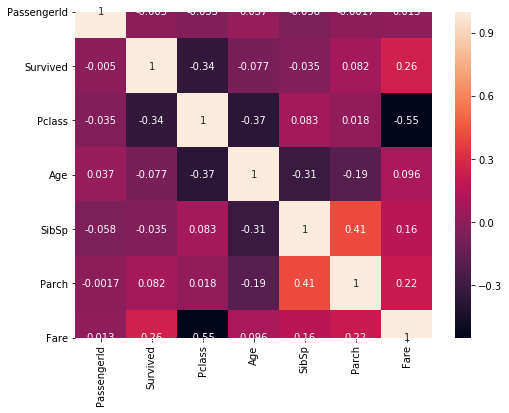

In [9]:
cor = train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, vmax=1, annot=True)
plt.show()

Based correlation, we can know that:
1. Parch (Bring parents) has strong correlation (0.41) with Sibsp (Having siblings)
2. Pclass has strong correlation (-0.34) with Survived (Means Gender plays important role)
3. Age has strong correlation (-0.37) with Pclass.

In [10]:
print(train.isnull().sum())
print('-'*40)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Based on the null data, we could know that:
1. In train data, we have null data in **age, cabin, and embarked**.
2. In test data, we have null data in **age, cabin, and fare**.

###  Pivoting Table Understanding

The goal of using pivoting table is to understand more about relationship between variables that we used.

<br> Several variables that we try to correlate are : </br>
1. gender and Survived rate
2. Pclass and Survived rate
3. Gender, Pclass, and Survived Rate
4. Embarked and Survived Rate
5. Parch (Parent) and Survived Rate
6. Parch (Parent), SibSp (Sibling, Spouse) and Survived Rate

<br> In pivoting table, we will only use **train data** because we want to correlate it with survival rate. </br>

Relationship between gender and survived rate:

In [11]:
gender_survived = train.groupby('Sex').Survived.mean().reset_index()
gender_survived

,Sex,Survived
0,female,0.742038
1,male,0.188908


Based on Gender, 74% female survived and only 18% men survived.

Relationship between class and survived:

In [12]:
class_survived = train.groupby('Pclass').Survived.mean().reset_index()
class_survived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


People who stayed on class 1, have higher chance to survived (62.9%) than people from class 2 (47.28%) and class 3 (24.23%).

Relationship between **gender**, **class**, and **survived rate**:

In [13]:
gender_class_survived = train.groupby(['Sex','Pclass']).Survived.mean().reset_index()
gender_class_survived

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


Based on this data, we can know that gender play more important role than class.

Relationship between **Embarked** and **Survived Rate**:

In [14]:
embarked_survived = train.groupby('Embarked').Survived.mean().reset_index()
embarked_survived 

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


People who embarked from C(Cherbourg) has the higher opportunity to survive than people who come from Q(Queenstown) and S(Southampton).

Relationship between **Parch (Parent)** and **Survived Rate** :

In [15]:
parch_survived = train.groupby('Parch').Survived.mean().reset_index()
parch_survived 

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Relationship between **Sibsp (Siblings)**, **Parch (Parent)** and **Survived Rate** :

In [16]:
table = pd.pivot_table(train, values='Survived', index=['SibSp', 'Parch'], aggfunc= 'mean').head()
table 

Survived
SibSp Parch          
0     0      0.303538
      1      0.657895
      2      0.724138
      3      1.000000
      4      0.000000

Based on this data, we can know that the highest rate of survival is for people who having 2 **Parch** and 1 **SibSp** and continued by 0 **Parch** and 2 **SibSp**.

### Visual Distributions

#### Univariate Distribution

**Age Distribution**

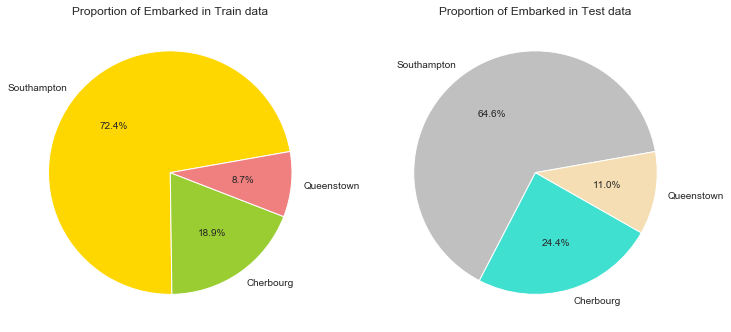

In [17]:
#set background and style of graph
sns.set_style('darkgrid')
sns.set_palette('pastel')

#figure size
plt.figure(figsize=(12,8))

#create 1st graph: Train data
colors = ['gold','yellowgreen','lightcoral']
plt.subplot(1,2,1)
plt.pie(train['Embarked'].value_counts(), labels = ['Southampton','Cherbourg','Queenstown'], 
        colors=colors, autopct = '%1.1f%%',startangle = 10)
plt.title('Proportion of Embarked in Train data')

#create 2nd graph: Test data
colors = ['silver','turquoise','wheat']
plt.subplot(1,2,2)
plt.pie(test['Embarked'].value_counts(), labels = ['Southampton','Cherbourg','Queenstown'], 
        colors=colors, autopct = '%1.1f%%',startangle = 10)
plt.title('Proportion of Embarked in Test data')

#show the data
plt.show()

**Gender Distribution**

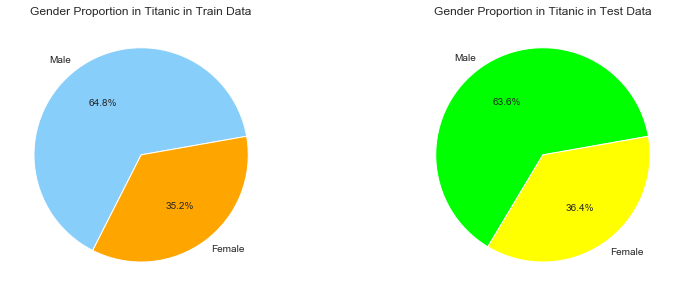

In [18]:
#figure size
plt.figure(figsize=(12,8))

#create 1st graph: Train data
color = ['lightskyblue','orange']
plt.subplot(1,2,1)
plt.pie(train['Sex'].value_counts(),labels=['Male','Female'],colors=color, autopct = '%1.1f%%',startangle = 10)
plt.title('Gender Proportion in Titanic in Train Data')

#create 2nd graph: Test data
color2 = ['lime','yellow']
plt.subplot(1,2,2)
plt.pie(test['Sex'].value_counts(),labels=['Male','Female'],colors=color2, autopct = '%1.1f%%',startangle = 10)
plt.title('Gender Proportion in Titanic in Test Data')

#adjust the distance between plot
plt.subplots_adjust(wspace=0.5)

#show the data
plt.show()

**Siblings Distribution**

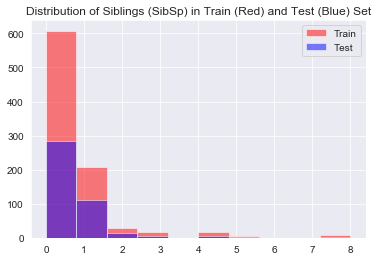

In [19]:
#create histogram in the graph
plt.hist(train['SibSp'], color= 'red',alpha = 0.5)
plt.hist(test['SibSp'], color= 'blue', alpha = 0.5)

#Title
plt.title('Distribution of Siblings (SibSp) in Train (Red) and Test (Blue) Set')
#Legend
plt.legend(['Train','Test'])

#show the data
plt.show()

**Parch Distribution**

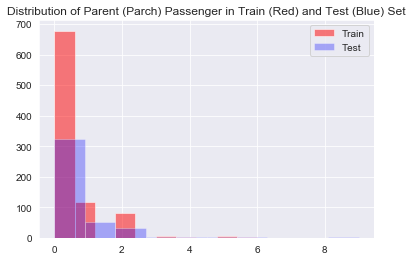

In [20]:
#create histogram in the graph
plt.hist(train['Parch'], color= 'red',alpha = 0.5)
plt.hist(test['Parch'], color= 'blue', alpha = 0.3)

#title
plt.title('Distribution of Parent (Parch) Passenger in Train (Red) and Test (Blue) Set')

#legend
plt.legend(['Train','Test'])

#show the data
plt.show()

**Fare Distribution**

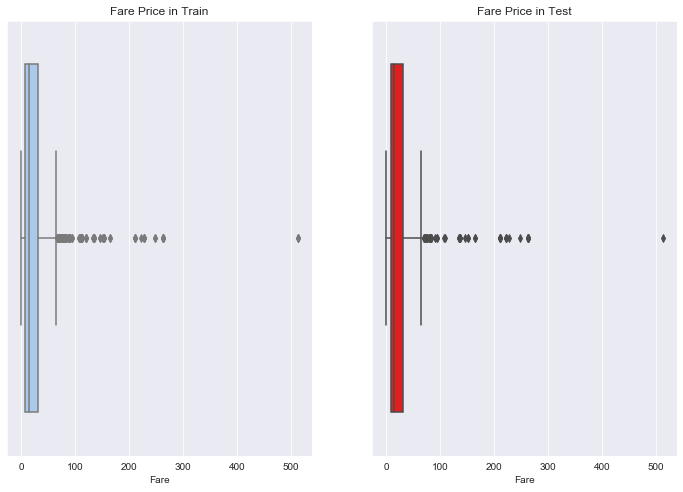

In [21]:
#figure size
plt.figure(figsize=(12,8))

#Create 1st graph
plt.subplot(1,2,1)
ax = sns.boxplot(x="Fare",data=train)
plt.title('Fare Price in Train')

#Create 2nd graph
plt.subplot(1,2,2)
ax = sns.boxplot(x="Fare",data=test, color='red')
plt.title('Fare Price in Test')

#show the data
plt.show()

**Conclusion :**
<br> Based on distribution, we can know that: </br>
1. Train and test distribution data are really simmilar
2. Most people embarked on Southampton
3. Male are more dominant than woman on taking the titanic based on gender.
4. Distribution of **SibSp (Siblings) ,Parch (Parent), and Fare** are extreme positive skew, which means most of passenger didn't bring siblings, parent, and pay a low fare.

#### Correlational Distribution

Age and Survived Rate

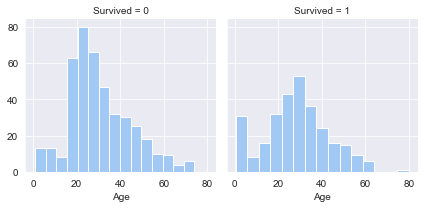

In [22]:
g = sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=15)
plt.show()

Based on data above, we can know that age 20 - 40 are the highest rate where most of the people are not survived. Also, if you see critically, you will realize that people below 10 years old have higher rate and opportunities to survive.

To improve understanding about data, we can divide the data based on sex and gender.

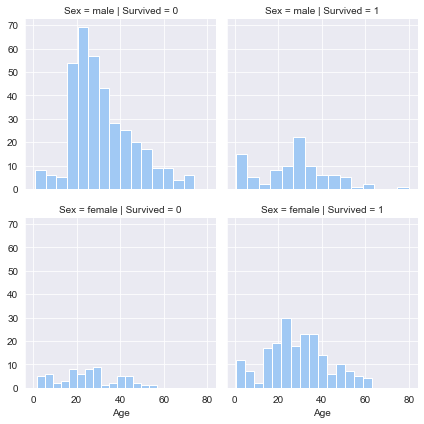

In [23]:
g1 = sns.FacetGrid(train,col='Survived',row='Sex')
g1.map(plt.hist,'Age',bins=15)
plt.show()

From this data, we can know:
<br> 1. Most people who didn't survived in Titanic are Male on 20 until around 40. </br>
<br> 2. Most people who survived in Titanic are Female around 20 until 40 years. </br>

Age based on Survived and Pclass

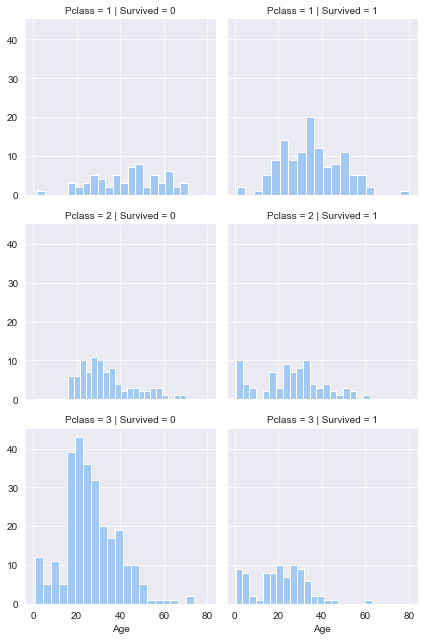

In [24]:
g2 = sns.FacetGrid(train,col='Survived',row='Pclass')
g2.map(plt.hist,'Age',bins=20)
plt.show()

Based on this data, we can know that:
<br> 1. People in **Pclass 1** have higher tendency to survived than die </br>
<br> 2. People in **Pclass 2** have 50/50% probabilities to survived and die </br>
<br> 3. People in **Pclass 3** have higher tendency to unsurvived than survived </br>

Let's known about the relationship between class and survived based on Embarked place.

/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


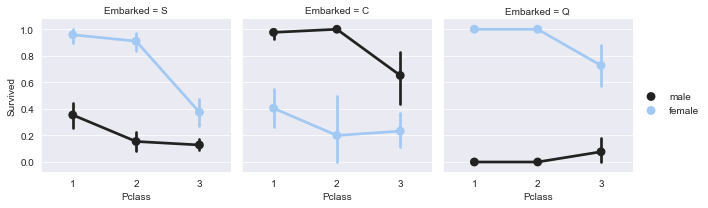

In [25]:
g3 = sns.FacetGrid(train,col='Embarked')
g3.map(sns.pointplot,'Pclass','Survived','Sex',c='red')
g3.add_legend()
plt.show()

Male who embarked from Cherbourg have a higher rate of survived.

/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


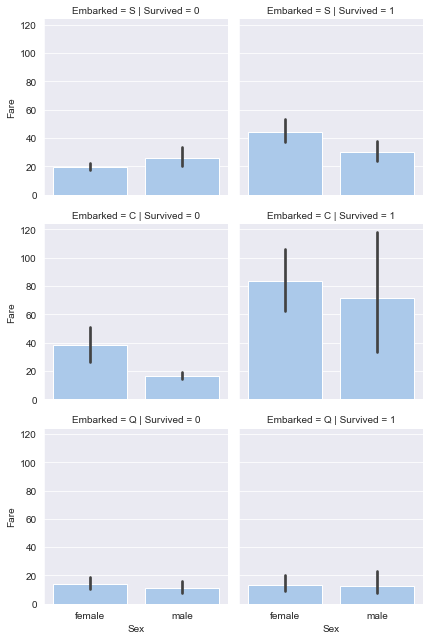

In [26]:
g4 = sns.FacetGrid(train,col='Survived',row='Embarked')
g4.map(sns.barplot, 'Sex','Fare')
g4.add_legend()
plt.show()

Based on this data, we could know that:
<br> 1. In Southampton & Cherbourg, people with higher fare have higher tendency to survive. </br>
<br> 2. In Queenstown, fare are not correlate with survive rate.

### Data Cleaning

Based on data understanding and visualization, we can know that there are several facts that we can know such as:
<br> a. **Female** have chance more likely to survive than **men** (**Sex** column) </br>
<br> b. column **Pclass** play important role on predicting survival rate </br>
<br> c. People who pay higher fare (especially in **Southampton and Cherbourg**) have higher rate to survive than people who pay lower rate.</br>
<br> d. Having **siblings (SibSp) and Parent/Spouse(Parch)** have higher tendency to survived.</br>
<br> e. People who most likely unsurvived are **men in age 20-40** </br>

Based on findings in every part, for our machine learning, we will use features:

<br> a. Sex = because gender plays important role on Titanic Survival </br>
<br> b. Pclass = class also plays important role </br>
<br> c. embarked </br>
<br> d. SibSp = By dividing it, into **have or have not** </br>
<br> e. Parch = By dividing it, into **have or have not** </br>
<br> f. Age = Will be divided based on categories </br>
<br> g. Fare = Will be divided based on categories </br>

<br> To achieve that, we will clean both **train and test data**</br>

#### Gender (Make into 0 = Female, 1 = Male)

Sex = because gender plays important role on Titanic Survival. We will change gender male and female into numeric number (female = 0, male = 1)

In [27]:
train['Sex'] = train['Sex'].replace('female',0)
train['Sex'] = train['Sex'].replace('male',1)
test['Sex'] = test['Sex'].replace('female',0)
test['Sex'] = test['Sex'].replace('male',1)

#### Age (Fill the null)

Since ages have some null inside them, we will fill the null with median scores.

In [28]:
print(train.Age.median())
print(test.Age.median())

28.0
27.0


In [29]:
train['Age'] = train['Age'].fillna(28)
test['Age'] = test['Age'].fillna(27)

#### Embarked (Make into 0 = S, 1 = Q, 2 = C)

Since there is 2 null in data embarked and most of the embarked comes from Southampton **(S)**. We will fill the null with the southampton.

In [30]:
train['Embarked'] = train['Embarked'].fillna('S')

In [31]:
train['Embarked'] = train['Embarked'].replace('S',int(0))
train['Embarked'] = train['Embarked'].replace('Q',int(1))
train['Embarked'] = train['Embarked'].replace('C',int(2))

test['Embarked'] = test['Embarked'].replace('S',int(0))
test['Embarked'] = test['Embarked'].replace('Q',int(1))
test['Embarked'] = test['Embarked'].replace('C',int(2))

#### Sibsp (Divide it into 0 = Not Have or 1 = Have)

Based on our distribution, **Sibsp** data is heavily distributed on 0 and low distribution on 1-8. Because of that, to make the data more equal **(between distributed and not distributed)**, we will change the data into categorical **(0 = Not have, 1 = Have)**.

In [32]:
print(train.SibSp.unique())
print(test.SibSp.unique())

[1 0 3 4 2 5 8]
[0 1 2 3 4 5 8]


In [33]:
train['SibSp'] = train['SibSp'].replace([1,2,3,4,5,8],1)
test['SibSp'] = train['SibSp'].replace([1,2,3,4,5,8],1)

In [34]:
print('train unique:{}'.format(train.SibSp.unique()))
print('test unique:{}'.format(test.SibSp.unique()))

train unique:[1 0]
test unique:[1 0]


####  Parch (Divide into 0 = have not or 1 = have)

Same as Sibsp, **Parch** distribution are heavily distributed on 0. To make the data more equal, we will change the data into categorical **(0 = Not Have, 1 = Have)**

In [35]:
print(train.Parch.unique())
print(test.Parch.unique())

[0 1 2 5 3 4 6]
[0 1 3 2 4 6 5 9]


In [36]:
train['Parch'] = train['Parch'].replace([1,2,3,4,5,6,9],1)
test['Parch'] = test['Parch'].replace([1,2,3,4,5,6,9],1)

In [37]:
print('train unique:{}'.format(train.Parch.unique()))
print('test unique:{}'.format(test.Parch.unique()))

train unique:[0 1]
test unique:[0 1]


#### Age divided (Based on Categories)

To know the best n categories, we can use pd.cut then use groupby to know the rate of survival based on mean.

In [38]:
train['AgeRange'] = pd.cut(train['Age'], 5)
train[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,AgeRange,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


After that, using **cat.codes**, we can make the age based on categories

In [39]:
train['AgeCategory'] = train['AgeRange'].cat.codes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.336, 32.252]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,"(32.252, 48.168]",2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.336, 32.252]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,"(32.252, 48.168]",2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,"(32.252, 48.168]",2


In [40]:
#Make a new label based on Age Category
bins = [-0.01,16.336,32.252,48.168,64.084,80.0]
labels = [0,1,2,3,4]
test['AgeCategory'] = pd.cut(test['Age'],bins,labels=labels)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,892,3,"Kelly, Mr. James",1,34.5,1,0,330911,7.8292,NaN,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,3
3,895,3,"Wirz, Mr. Albert",1,27.0,1,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,0,1,3101298,12.2875,NaN,0,1


#### Fare divided (Based on Categories)

We will make the fare divided into 4 categories based on Percentile data:
<br> a. 0 - 25% (very low) </br>
<br> b. 25 - 50% (low) </br>
<br> c. 50 - 75% (high) </br>
<br> d. 75 - 100% (very high) </br>

In [41]:
print(test.Fare.mode())
test['Fare'] = test['Fare'].fillna(7.75)

0    7.75
dtype: float64


Find the percentile of each data:

In [42]:
print(train.Fare.describe())
print('-'*40)
print(test.Fare.describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
----------------------------------------
count    418.000000
mean      35.560497
std       55.857145
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64


In [43]:
bins = [-0.01,7.9104,14.4542,31.00,512.3292]
labels = [0,1,2,3]
train['FareCategory'] = pd.cut(train['Fare'],bins,labels=labels)
test['FareCategory'] = pd.cut(test['Fare'],bins,labels=labels)

In [44]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FareCategory
0,892,3,"Kelly, Mr. James",1,34.5,1,0,330911,7.8292,NaN,1,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,3,1


#### Drop Column (Ticket, Fare, Cabin,AgeRange)

We will drop **Ticket, Fare, Cabin, AgeRange, Age, Name, and PassengerId** column because we don't need it on analysis.

In [45]:
train2 = train.drop(['Ticket','Fare','Cabin','AgeRange','Age','Name','PassengerId'],axis=1)
train2.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeCategory,FareCategory
0,0,3,1,1,0,0,1,0
1,1,1,0,1,0,2,2,3
2,1,3,0,0,0,0,1,1
3,1,1,0,1,0,0,2,3
4,0,3,1,0,0,0,2,1


In [46]:
test2 = test.drop(['Ticket','Fare','Cabin','Age','Name','PassengerId'],axis=1)
test2.head(100)

,Pclass,Sex,SibSp,Parch,Embarked,AgeCategory,FareCategory
0,3,1,1,0,1,2,0
1,3,0,1,0,0,2,0
2,2,1,0,0,1,3,1
3,3,1,1,0,0,1,1
4,3,0,0,1,0,1,1
...,...,...,...,...,...,...,...
95,3,1,0,0,0,1,0
96,1,0,0,0,0,4,3
97,3,1,0,0,0,1,1
98,3,0,0,0,0,1,0


## Modelling

After we clean the data, we will use several machine learning to predict the best machine learning that we can use to predict Titanic Model.

Divide the data into train and test data.

In [47]:
X_train = train2.drop('Survived',axis=1)
Y_train = train2['Survived']
X_test = test2
features = ['Pclass', 'Sex','SibSp','Parch','Embarked','AgeCategory','FareCategory']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(891, 7)
(891,)
(418, 7)


### Logistic Regression

In [48]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

#correlates logistic regression with a variables
logreg = LogisticRegression()

#fit the logistic regression with X and Y train
logreg.fit(X_train, Y_train)

#Find accuracy and prediction
Y1_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

print('Accuracy : {}'.format(acc_log))

Accuracy : 78.56


/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
coeff = pd.DataFrame(X_train.columns)
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logreg.coef_[0])

coeff.sort_values(by='Correlation', ascending=True)

,Feature,Correlation
1,Sex,-2.409750
0,Pclass,-0.843511
5,AgeCategory,-0.378563
2,SibSp,-0.187495
3,Parch,-0.044148
6,FareCategory,0.172459
4,Embarked,0.284490


### Support Vector Machine (SVM)

In [50]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, Y_train)
Y2_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

print('Accuracy : {}'.format(acc_svc))

Accuracy : 82.15


/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### K Neighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)
Y3_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

print('Accuracy : {}'.format(acc_knn))

Accuracy : 85.63


### Gaussian Naive Bayes Statistic

In [52]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y4_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

print('Accuracy : {}'.format(acc_gaussian))

Accuracy : 75.87


### Random Forest 

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y5_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print('Accuracy : {}'.format(acc_random_forest))

Accuracy : 87.32


In [54]:
feature_imp = pd.Series(random_forest.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Sex             0.401597
Pclass          0.175097
FareCategory    0.133963
AgeCategory     0.129489
Embarked        0.069048
Parch           0.048191
SibSp           0.042616
dtype: float64

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y6_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

print('Accuracy : {}'.format(acc_decision_tree))

Accuracy : 87.32


In [56]:
feature_imp = pd.Series(decision_tree.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Sex             0.476204
Pclass          0.201504
AgeCategory     0.094728
FareCategory    0.078750
Parch           0.058321
Embarked        0.056946
SibSp           0.033547
dtype: float64

**CONCLUSIONS**:

<br> Based on machine learning, we can know that </br>:

<table>
<thead>
<tr><th>Machine Learning</th><th>Accuracy Score</th><th>Top Three Features</th></tr>
</thead>
<tbody>
    <tr><td>Random Forest</td><td>87.32</td><td>Sex, Class, and Age Category</td></tr>
    <tr><td>Decision Tree</td><td>87.32</td><td>Sex,Class, and Age Category</td></tr>
    <tr><td>KNN Classifier</td><td>85.63</td><td>*</td></tr>
    <tr><td>Support Vector Machine (SVM)</td><td>82.15</td><td>*</td></tr>
    <tr><td>Logistic Regression</td><td>78.56</td><td>Sex,Class, and Age Category</td></tr>
    <tr><td>Naive Bayes Statistic</td><td>75.87</td><td>*</td></tr>
</tbody>
</table>


<br> * = *means that that I cannot predict the feature importance. (Will be updated, if I find it!)* </br>

<br> We also can know that **sex, class, and age** are the most three feature that have huge importance on machine learning that we made </br>

## Submission

In [57]:
test3 = test.copy()
test3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FareCategory
0,892,3,"Kelly, Mr. James",1,34.5,1,0,330911,7.8292,NaN,1,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,3,1
3,895,3,"Wirz, Mr. Albert",1,27.0,1,0,315154,8.6625,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,0,1,3101298,12.2875,NaN,0,1,1


In [58]:
test3['Survived'] = Y5_pred

In [59]:
test3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FareCategory,Survived
0,892,3,"Kelly, Mr. James",1,34.5,1,0,330911,7.8292,NaN,1,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,2,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,3,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,1,0,315154,8.6625,NaN,0,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,0,1,3101298,12.2875,NaN,0,1,1,1


In [60]:
test4 = test3.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','AgeCategory','FareCategory'],axis=1)

In [61]:
test4.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [63]:
#Make the file into CSV
test4.to_csv('submission.csv',index = False)